# Code to produce figure 5b and 8b

### Zoïs Moitier (2021)
            
_Karlsruhe Institute of Technology, Germany_

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

import scr
from scr import analytic, bie

%matplotlib inline

## Internal plotting functions

In [2]:
def calc_err(result, u_ana, u_max):
    return np.abs(result[0] - u_ana).max() / u_max

In [3]:
def plot_err(param):
    α = param["α"]
    k = param["k"]

    M = param["M"]

    N_vec = param["N_vec"]
    ε_vec = param["ε_vec"]
    ε_str = param["ε_str"]

    err = np.empty((len(ε_vec), len(N_vec)))

    for i, ε in enumerate(ε_vec):
        E = scr.Ellipse(ε)
        c, ξ0 = analytic.ellipse_param(1, ε)

        in_field = analytic.field_plane_wave(ε, c, α, k, M)
        sc_field = analytic.solve_field(in_field, ξ0, param["p"])

        for j, N in enumerate(N_vec):
            θ, _ = bie.grid(N)
            u_ana = param["trace_ana"](in_field)(θ) + param["trace_ana"](sc_field)(θ)
            u_max = np.abs(u_ana).max()

            err[i, j] = calc_err(
                param["solver"](E, k, param["trace_input"](in_field), N), u_ana, u_max
            )

    fig_size = [1.25 * e for e in [6.4, 4.8]]
    fig, ax = plt.subplots(figsize=fig_size, constrained_layout=True)

    log_norm_err = LogNorm(err.min(), err.max())
    sns.heatmap(
        err,
        ax=ax,
        cmap="YlGnBu_r",
        norm=log_norm_err,
        xticklabels=N_vec,
        yticklabels=[f"{x:.1e}" for x in ε_vec],
    )
    ax.set_xlabel(r"$2N$", fontsize=15)
    ax.set_ylabel(r"$\varepsilon$", fontsize=15)
    ax.set_aspect("equal", "box")

    cbar_ax = fig.axes[-1]
    cbar_ax.tick_params(which="minor", length=0)

    return None

## Parameters

In [4]:
## Incident field parameters
α = 0  # (cos(α), sin(α)) direction of the plane wave
k = 2  # wavenumber direction of the plane wave
M = 15  # 2M+1 number of mode in the analytic sum

In [5]:
## Discretization parameters
N_min, N_max = 16, 512
nb_N = 8
N_vec = scr.logspace_quadrature(N_min, N_max, nb_N)

ε_min, ε_max = 1e-8, 0.9
nb_ε = 8
ε_vec = scr.logspace_epsilon(ε_min, ε_max, nb_ε)[::-1]
ε_str = [f"{x:.1e}" for x in ε_vec]

## Neuman boundary condition

### Relative error for QPAX

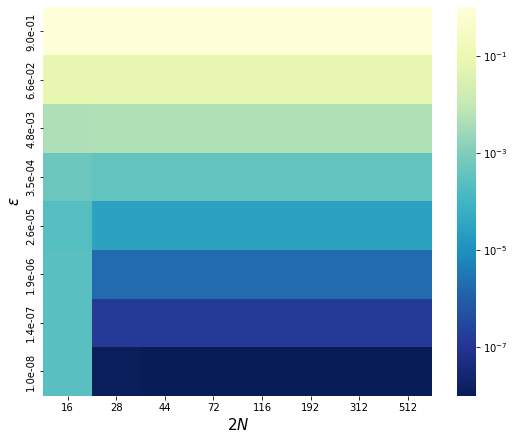

In [6]:
plot_err(
    {
        "α": α,
        "k": k,
        "M": 15,
        "N_vec": N_vec,
        "ε_vec": ε_vec,
        "ε_str": ε_str,
        "trace_ana": scr.trace,
        "trace_input": scr.trace_neumann_expansion,
        "p": 1,
        "solver": bie.helmholtz_neumann_qpax,
    }
)

### Relative error for PQR

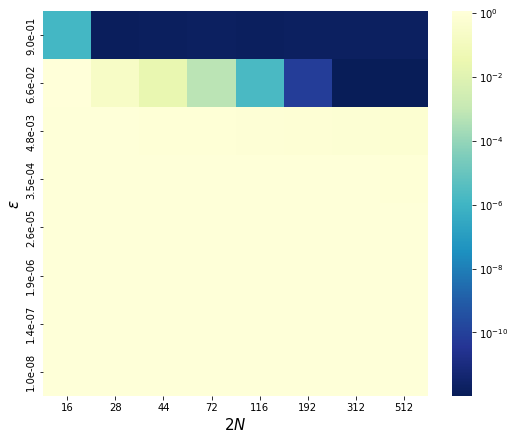

In [7]:
plot_err(
    {
        "α": α,
        "k": k,
        "M": 15,
        "N_vec": N_vec,
        "ε_vec": ε_vec,
        "ε_str": ε_str,
        "trace_ana": scr.trace,
        "trace_input": scr.trace,
        "p": 1,
        "solver": bie.helmholtz_neumann_pqr,
    }
)

## Dirichlet boundary condition

### Relative error for QPAX

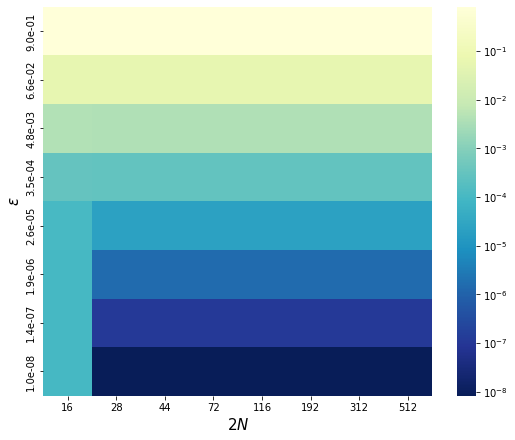

In [8]:
plot_err(
    {
        "α": α,
        "k": k,
        "M": 15,
        "N_vec": N_vec,
        "ε_vec": ε_vec,
        "ε_str": ε_str,
        "trace_ana": scr.scaled_normal_trace,
        "trace_input": scr.trace_dirichlet_expansion,
        "p": 0,
        "solver": bie.helmholtz_dirichlet_qpax,
    }
)

### Relative error for PQR

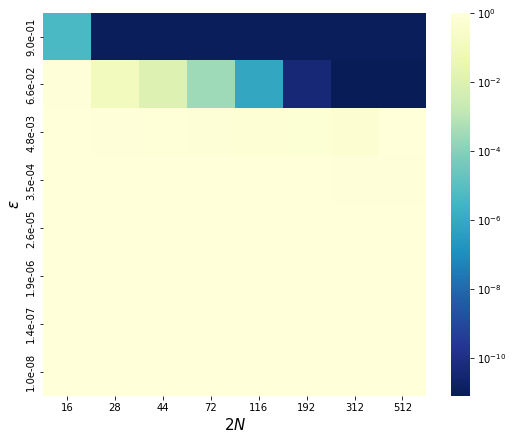

In [9]:
plot_err(
    {
        "α": α,
        "k": k,
        "M": 15,
        "N_vec": N_vec,
        "ε_vec": ε_vec,
        "ε_str": ε_str,
        "trace_ana": scr.scaled_normal_trace,
        "trace_input": scr.scaled_normal_trace,
        "p": 0,
        "solver": bie.helmholtz_dirichlet_pqr,
    }
)